# CS 5483: Project 4

### Himadri Sen Gupta

#### Question 1: Module 7 -- Real world networks and features

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

1.a) Read the graph from https://networkrepository.com/power-US-Grid.php

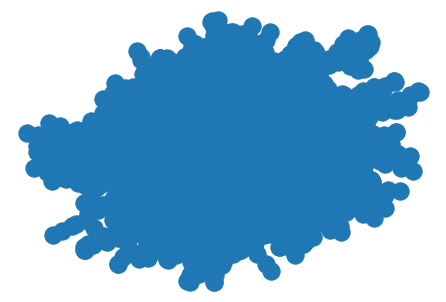

In [2]:
#Reading the graph after downloading and unzipping the files

N1 = nx.read_edgelist("power-US-Grid.mtx")

#Drawing the nework
nx.draw(N1, with_labels = False)

1.b) For the given graph compute the degree distribution. (Do not use networkx library to compute the distribution)

In [3]:
from collections import defaultdict
import collections

#Function for calcuting degree without networkx library
def degrees(G):
    
    degree = defaultdict(int)
    for u,v in ((u,v) for u,v,d in G.edges(data=True)): 
        degree[u] = degree[u] + 1
        degree[v] = degree[v] + 1
        
    #this list will be list of all the degrees of all the nodes of the network
    return list(degree.values())

In [4]:
print(f"The mean degree of the network is {np.mean(degrees(N1))}")
print(f"The standard deviation of the degrees of the network is {np.std(degrees(N1))}")

The mean degree of the network is 2.66950010119409
The standard deviation of the degrees of the network is 1.79157293722722


In [5]:
from empiricaldist import Pmf ## pip install empiricaldist - PMF - Probability Mass Function

In [6]:
pmf_N1 = Pmf.from_seq(degrees(N1))
for i in range (1,11):
    print(f"{pmf_N1[i]*100}% of the nodes have {i} neighbors")

24.812790933009513% of the nodes have 1 neighbors
33.51548269581057% of the nodes have 2 neighbors
21.43290831815422% of the nodes have 3 neighbors
8.115766039263308% of the nodes have 4 neighbors
5.1204209674155035% of the nodes have 5 neighbors
2.7727180732645214% of the nodes have 6 neighbors
1.700060716454159% of the nodes have 7 neighbors
0.9309856304391825% of the nodes have 8 neighbors
0.546448087431694% of the nodes have 9 neighbors
0.5262092693786683% of the nodes have 10 neighbors


(2.6695001011940906, 1.79157293722722)

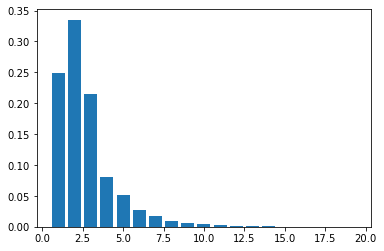

In [7]:
#Ploting the distribution plot
pmf_N1.bar()
pmf_N1 = Pmf.from_seq(degrees(N1))
pmf_N1.mean(), pmf_N1.std()

1.c) Plot a log-log graph of the distribution where x-axis represents log of degrees, and the y-axis represents log of frequency of the degrees. Does the plot show a linear decay?

In [8]:
freq = collections.Counter(degrees(N1))

In [9]:
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1])}

In [10]:
degrees_N1 = np.log(list(freq.keys()))
print(list(degrees_N1))
frequency_N1 = np.log(list(freq.values()))
print(list(frequency_N1))

[2.8903717578961645, 2.9444389791664403, 2.6390573296152584, 2.5649493574615367, 2.4849066497880004, 2.3978952727983707, 2.302585092994046, 2.1972245773362196, 2.0794415416798357, 1.9459101490553132, 1.791759469228055, 1.6094379124341003, 1.3862943611198906, 1.0986122886681098, 0.0, 0.6931471805599453]
[0.0, 0.0, 1.0986122886681098, 1.6094379124341003, 1.6094379124341003, 2.3978952727983707, 3.258096538021482, 3.295836866004329, 3.828641396489095, 4.430816798843313, 4.919980925828125, 5.53338948872752, 5.993961427306569, 6.9650803456014065, 7.111512116496157, 7.412160334945205]


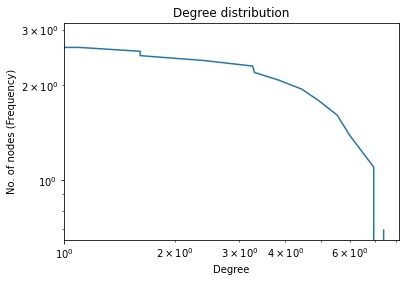

In [11]:
plt.loglog(frequency_N1,degrees_N1)
plt.xlabel("Degree")
plt.ylabel("No. of nodes (Frequency)")
plt.title("Degree distribution")
plt.show()

1.d) Determine alpha in the power law distribution using the equation

 alpha = 1 + n/(summation ln 𝑥_𝑖/(𝑥_min−1/2))
 - i ranges from 0 to number of degrees
 - where n in number of degrees
 - x_i is each degree in the degree array
 - x_min is the minimum degree

In [26]:
alpha = 1 + (len(degrees(N1)))/(((sum([np.log(i) for i in degrees(N1)]))/min(degrees(N1)) - 0.5))

print(alpha)

2.246774506271625


#### Question 2: Module 8 -- Random graphs
*You may use networkx library*

2.a) Construct 5 random undirected graph with n = 1000, and probability 0.01, 0.1, 0.2, 0.3, 0.5 as G1, G2, G3, G4, and G5. Then find the size of the largest connected component. 

**Note : Use different seed value for each graph.**

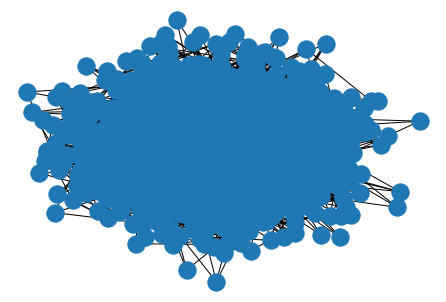

In [13]:
G1 = nx.fast_gnp_random_graph(n = 1000, p = 0.01, seed = 5113)
nx.draw(G1,with_labels=False)

In [14]:
#The size of the largest connected component

largest_cc = max(nx.connected_components(G1), key=len)
print(len(largest_cc))

1000


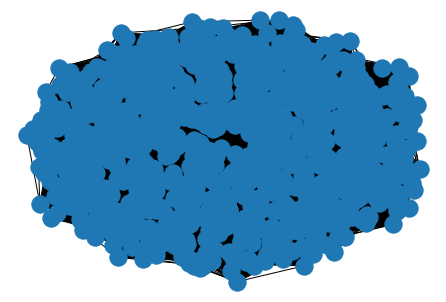

In [15]:
G2 = nx.fast_gnp_random_graph(n = 1000, p = 0.1, seed = 1234)
nx.draw(G2,with_labels=False)

In [16]:
#The size of the largest connected component

largest_cc_1 = max(nx.connected_components(G2), key=len)
print(len(largest_cc_1))

1000


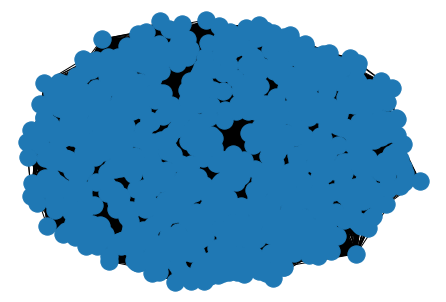

In [17]:
G3 = nx.fast_gnp_random_graph(n = 1000, p = 0.2, seed = 2345)
nx.draw(G3,with_labels=False)

In [18]:
#The size of the largest connected component

largest_cc_2 = max(nx.connected_components(G3), key=len)
print(len(largest_cc_2))

1000


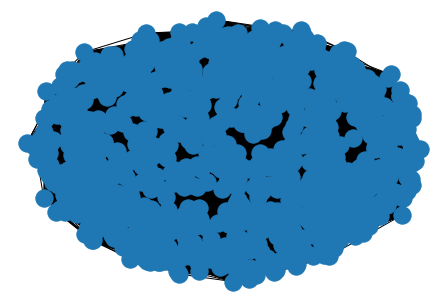

In [19]:
G4 = nx.fast_gnp_random_graph(n = 1000, p =0.3, seed = 5678)
nx.draw(G4,with_labels=False)

In [20]:
#The size of the largest connected component

largest_cc_3 = max(nx.connected_components(G4), key=len)
print(len(largest_cc_3))

1000


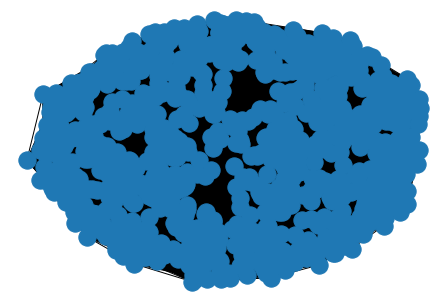

In [21]:
G5 = nx.fast_gnp_random_graph(n = 1000, p =0.5, seed = 3456)
nx.draw(G5,with_labels=False)

In [22]:
#The size of the largest connected component

largest_cc_4 = max(nx.connected_components(G5), key=len)
print(len(largest_cc_4))

1000


2.b) Plot the following

- x-axis probablity
- y-axis largest connected component

and infer what does increase in probablity mean with respect to the largest connected component


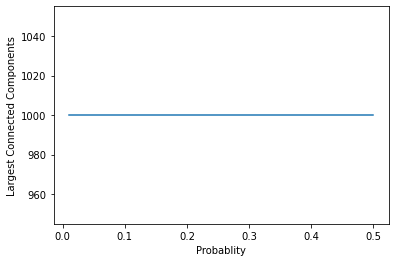

In [23]:
x = [0.01, 0.1, 0.2, 0.3, 0.5]

y = [1000, 1000, 1000, 1000, 1000]

plt.xlabel('Probablity')
plt.ylabel('Largest Connected Components')
plt.plot(x,y)
plt.show()

Here, the probablity is the probablity of edge creation. For this specific problem, this probablity is not affecting the largest connected component. Its created a kind of giant component.

2.c) For the same set of graphs, compute the average degree and plot probablity on the x-axis, and average degree on the y-axis


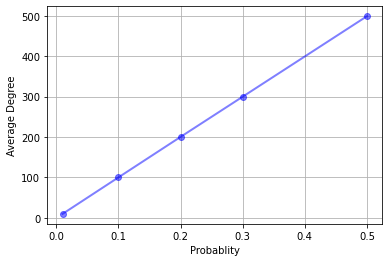

In [24]:
avg_degree = []
graphs = [G1,G2,G3,G4,G5]
for i in graphs:
    avg_degree.append(np.mean(degrees(i)))
prob = [0.01, 0.1, 0.2, 0.3, 0.5]

plt.xlabel('Probablity')
plt.ylabel('Average Degree')
plt.plot(prob,avg_degree, linewidth=2.0,
         linestyle='-',
         color='blue',
         alpha=0.5,
        marker = 'o' )
plt.grid(True)
plt.show()

2.d) Finally, compute the average size of the small component for each graph G1, ..., G5

In [25]:
def small(g):
    count = 0
    for component in list(nx.connected_components(g)):
        if len(component)<3:
            count = count +1 
    return count

graphs = [G1,G2,G3,G4,G5]

size = []
for i in graphs:    
    size.append(small(i))
print(size)   

[0, 0, 0, 0, 0]


### Basically, from the 2(a) we can see that there is only one component of 1000 modes. So, there is no isolated nodes in this graphs G1,G2,G3,G4,G5. So, the size of the components are also 1000.  